<a href="https://colab.research.google.com/github/pedro-varela1/Arquivos_ELE-606/blob/main/Atividade_3_DT_ELE606.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação com Decision Trees
## ELE606 - Tópicos Especiais em Inteligência Artificial

> Aluno: [Pedro Artur Varela](https://github.com/pedro-varela1)

<img src="https://i1.wp.com/cloudmark.github.io/images/kotlin/ID3.png"
    style="width:500px; float: right; margin: 0 40px 40px 40px;"></img>
  
![divider](https://webstockreview.net/images/divider-clipart-design-line-5.png)



## Introdução

Árvores de Decisão (DTs) são um método de aprendizagem supervisionado não paramétrico usado para classificação e regressão. O objetivo é criar um modelo que preveja o valor de um variável alvo aprendendo regras de decisão simples inferidas a partir dos dados Características. Uma árvore pode ser vista como uma aproximação constante por partes.

---

## Algoritmo e código

### Pré-processamento dos dados

Primeiramente, vamos importar os módulos utilizados.

In [ ]:
!pip install tensorflow_decision_forests

In [ ]:
import tensorflow as tf   # Modelos de IA e trabalho com tensores
import tensorflow_decision_forests as tfdf    # Modelo Florestas de Decisão - Árvores de Decisão
import pandas as pd   # Manipulação dos dados
import seaborn as sns   # Visualização
import matplotlib.pyplot as plt   # Visualização
import numpy as np    # Manipulação Numérica
from sklearn.datasets import load_wine    # Carregar dataset

Vamos carregar a base de dados na configuração desejada (esse passo realizamos na atividade anterior).

In [ ]:
wine_data = load_wine()
wine_df = pd.DataFrame(data = wine_data['data'], columns = wine_data['feature_names'])
wine_df['target'] = wine_data['target']

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


É sempre importante realizarmos algumas análise na estrutura de dados que nós temos.

In [ ]:
wine_df.info()    # Informações

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
wine_df.describe()   # Descrição de colunas numéricas

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


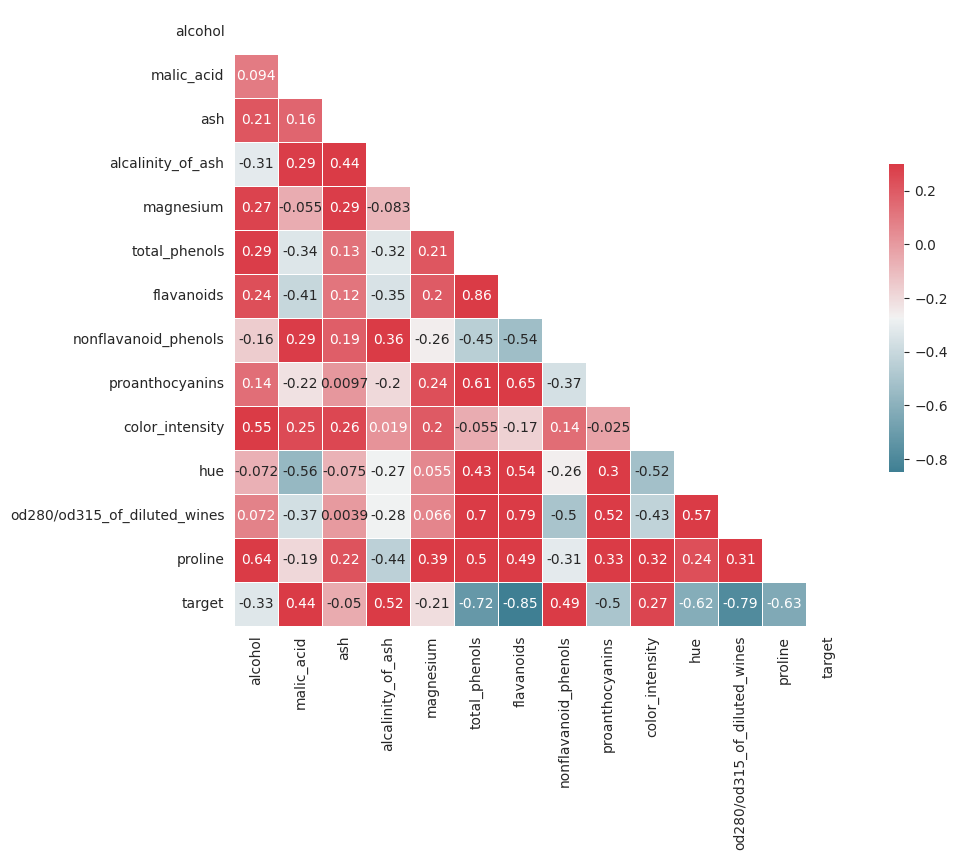

In [ ]:
# Ver mapa de calor mostrando a correlação entre as variáveis

corr = wine_df.corr()   # Retirar correlação

# Gerar máscara para o gráfico - será triangular
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Gerar um colormap diversificado
cmap = sns.diverging_palette(220, 10, as_cmap=True)

with sns.axes_style("white"):
    # Gerar a figura com o matplotlib
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, cmap=cmap, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Vemos que a correlação de _ash_ com o _target_ é muito pequena, vamos retirar essa coluna da análise.

In [ ]:
wine_df.drop(['ash'], axis = 1, inplace = True)
wine_df.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Vamos separar os dados de treinamento e os dados de teste.

In [ ]:
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(wine_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

122 examples in training, 56 examples in testing.


Agora, para manipular o modelo com o Tensorflow, é necessário converter os dados de pandas dataframe para tensor.

In [ ]:
label = 'target'

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)

valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)

Vamos construir o modelo da Floresta de Decisão, com os parâmetros padrão do Tensorflow. É necessário fazer a mudança no parâmetro _task_ para regressão, não classificação.

In [ ]:
rf = tfdf.keras.RandomForestModel(num_trees=200)
rf.compile(metrics=["accuracy", "mse"])

Use /tmp/tmpmoo802ad as temporary training directory


### Treinamento do Modelo

O modelo já está projeto, agora basta treiná-lo.

In [ ]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:07.814246. Found 122 examples.
Training model...
Model trained in 0:00:00.193198
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


Vamos ver o formato da árvore de decisão de índice 0.

In [ ]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

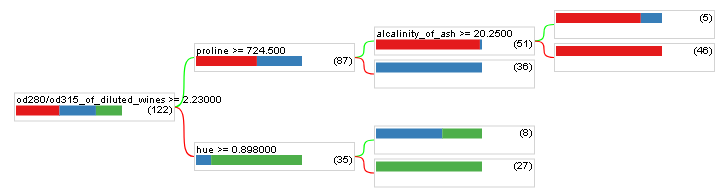

### Análise dos Resultados

Vamos analisar os resultados através do gráfico da acurácia pelo número de árvores.

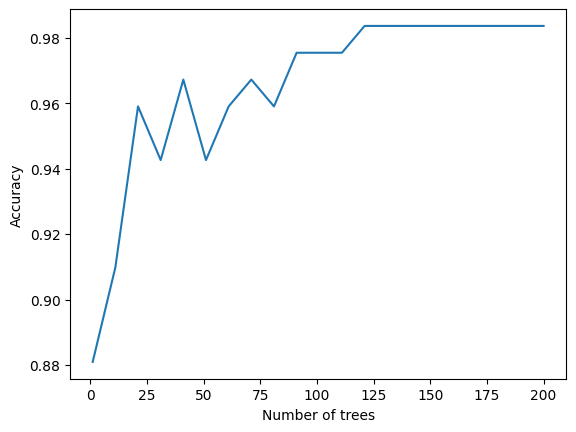

In [ ]:
logs = rf.make_inspector().training_logs()

plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.show()

Vamos ter uma visão geral da acurácia final.

In [ ]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 986ms/step - loss: 0.0000e+00 - accuracy: 0.9643 - mse: 1.1719
loss: 0.0000
accuracy: 0.9643
mse: 1.1719
